#Project 9: Car Price Prediction using Machine Learning with Python

Surendra Prajapat

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# DataSet Link : https://bit.ly/3kyWTSH
car_data = pd.read_csv("/content/car data.csv")

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [29]:
# Encoding Fuel_Type Columns
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

# Encoding Seller_Type Columns
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

# Encoding Transmission Columns
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


Petrol-->0, 
Diesel-->1, 
CNG-->2

Dealer-->0, 
Individual-->1

Manual-->0, 
Automatoc-->1

In [30]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [31]:
x = car_data.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [32]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [49]:
# Spliting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [34]:
print(x.shape, x_train.shape, x_test.shape)

(301, 7) (240, 7) (61, 7)


In [35]:
print(x_train)
print(y_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
235  2017           9.40       15141          0            0             0   
106  2014           3.45       16500          0            1             0   
10   2017           3.60        2135          0            0             0   
152  2012           0.99       13000          0            1             0   
77   2004          12.35      135154          0            0             1   
..    ...            ...         ...        ...          ...           ...   
75   2015           6.80       36000          0            0             0   
22   2011           8.01       50000          0            0             1   
72   2013          18.61       56001          0            0             0   
15   2016          10.79       43000          1            0             0   
168  2013           0.73       12000          0            1             0   

     Owner  
235      0  
106      1  
10       0  
152      0 

In [36]:
model = LinearRegression()

In [39]:
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [41]:
training_data_prediction = model.predict(x_train)

In [43]:
# R square Error
error_score = metrics.r2_score(y_train, training_data_prediction)

In [44]:
print("R square Error: ", error_score)

R square Error:  0.8838169193709796


Visualize the actual prices and Predicted price

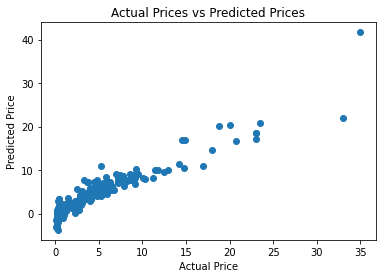

In [46]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [47]:
test_data_prediction = model.predict(x_test)

In [50]:
# R square Error
error_score = metrics.r2_score(y_test, test_data_prediction)

In [51]:
print("R sqaure Error: ", error_score)

R sqaure Error:  0.8401532365377697


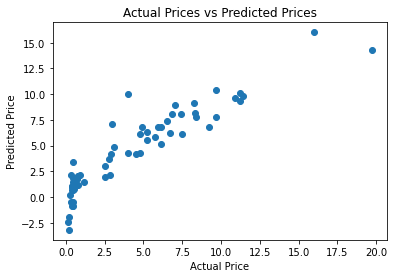

In [52]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Lasso Regression

In [53]:
lasso_model = Lasso()

In [54]:
lasso_model.fit(x_train, y_train)

Lasso()

Model Evaluation

In [63]:
training_data_prediction = lasso_model.predict(x_train)

In [64]:
# R square Error
error_score = metrics.r2_score(y_train, training_data_prediction)

In [65]:
print("R square Error: ", error_score)

R square Error:  0.843587395258283


Visualize the actual prices and Predicted price

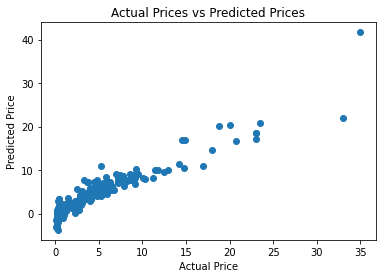

In [58]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [66]:
test_data_prediction = lasso_model.predict(x_test)

In [67]:
# R square Error
error_score = metrics.r2_score(y_test, test_data_prediction)

In [68]:
print("R sqaure Error: ", error_score)

R sqaure Error:  0.8497457570738539


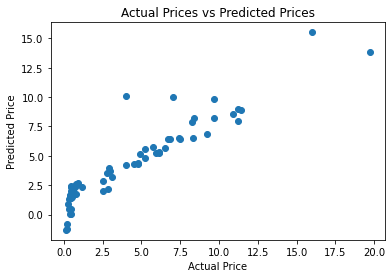

In [69]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()